# STAT201 Project Proposal

# Exploring the impact of critic scores on user scores between different Entertainment Software Rating Board (ESRB) ratings

## Introduction

The rise in popularity of video games has inserted itself in many people’s lives, as and such, the introduction for a rating system was deemed necessary. The Entertainment Software Rating Board (ESRB) was established to inform consumers about the games that are being played. Particularly, parents highly value understanding details of the games their children participate in playing. The dataset we will be using to perform our analysis was sourced from kaggle.com and was generated by a scrape of VGChartz (Video Game Charts), a reputable industry research firm that publishes video game data. Though the original data set has 16 columns and over 50,000 observations, we have chosen to keep only the following fields:

- `ESRB_Rating` – Everyone, Everyone (10+), Teen (13+), Mature (17+)
- `Critic_Score` – 3rd party rating out of 10
- `User_Score` – Open-sourced rating out of 10

Using this dataset, we plan to ask the question: Between different ESRB ratings, how differently do critics and users rate video games? In answering this question, we hope to discover any discrepancies between Critic Scores and User Scores within different ESRB age-ratings and apply any findings to some of the research that already exists in this topic.

## Preliminary Results

First, we loaded the necessary libraries and read the Video Game Sales 2019 dataset (Figure 1). Next, we tidied our data by selecting the variables that will contribute to our analysis (`Critic_Score`, `User_Score`, and `ESRB_Rating`), and filtering out NA and/or "" values from the three variables (Figure 2). 

In [1]:
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(datateachr))
suppressPackageStartupMessages(library(digest))
suppressPackageStartupMessages(library(infer))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(taxyvr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(broom))

#### Original Dataset

In [2]:
temp <- tempfile()
download.file("https://cdn.discordapp.com/attachments/993991150010642472/1000890019470377092/archive.zip",temp, mode = "wb")
con <- unz(temp, "vgsales-12-4-2019.csv")
data <- read.csv(con)
unlink(temp)
head(data)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,⋯,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<dbl>,<chr>
1,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NA,7.7,⋯,NA,NA,NA,NA,2006,,http://www.vgchartz.com/game/2667/wii-sports/?region=All,1,NA,/games/boxart/full_2258645AmericaFrontccc.jpg
2,2,Super Mario Bros.,super-mario-bros,Platform,,NES,Nintendo,Nintendo EAD,NA,10.0,⋯,NA,NA,NA,NA,1985,,http://www.vgchartz.com/game/6455/super-mario-bros/?region=All,1,NA,/games/boxart/8972270ccc.jpg
3,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NA,8.2,⋯,NA,NA,NA,NA,2008,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-wii/?region=All,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
4,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,,PC,PUBG Corporation,PUBG Corporation,NA,NA,⋯,NA,NA,NA,NA,2017,13th Nov 18,http://www.vgchartz.com/game/215988/playerunknowns-battlegrounds/?region=All,1,NA,/games/boxart/full_8052843AmericaFrontccc.jpg
5,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NA,8.0,⋯,NA,NA,NA,NA,2009,,http://www.vgchartz.com/game/24656/wii-sports-resort/?region=All,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
6,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NA,9.4,⋯,NA,NA,NA,NA,1998,,http://www.vgchartz.com/game/4030/pokemon-red-green-blue-version/?region=All,1,NA,/games/boxart/full_6442337AmericaFrontccc.png


*Figure 1.* Figure of the original dataset.

#### Tidy Data

In [3]:
wrangled_data <- data %>%
    filter(!is.na(Critic_Score),
           !is.na(User_Score),
           !(ESRB_Rating == "")) %>%
    select(Critic_Score, User_Score, ESRB_Rating) %>%
    as_tibble() %>%
    mutate(ESRB_Rating = as.factor(ESRB_Rating))
head(wrangled_data)

Critic_Score,User_Score,ESRB_Rating
<dbl>,<dbl>,<fct>
8.2,9.1,E
8.0,8.8,E
9.1,8.1,E
8.6,9.2,E
5.9,4.5,E
9.1,9.4,E


*Figure 2.* Figure of the tidy data.

#### Summary Statistics
After tidying our data, we calculated some summary statistics including count, mean, and standard error of user and critic scores for each ESRB rating. 

In [5]:
summary_table = group_by(wrangled_data, ESRB_Rating) %>%
    summarize(count = n(),
              mean_critic_score = mean(Critic_Score), 
              mean_user_score = mean(User_Score), 
              SE_critic_score = sd(Critic_Score), 
              SE_user_score = sd(User_Score))
summary_table

ESRB_Rating,count,mean_critic_score,mean_user_score,SE_critic_score,SE_user_score
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
E,41,8.178049,8.617073,1.118819,1.2041392
E10,23,7.595652,8.265217,1.414689,1.5746886
M,73,8.382192,8.600000,1.190511,0.8993825
T,77,8.036364,8.644156,1.134844,0.9597825


*Table 1.* Table of summary statistics.

#### Boxplots
To visualize the comparison between user and critic scores for each ESRB rating, we plotted side-by-side boxplots (Figure 3). Notice that the range of rating values is greater for critic scores than for user scores.

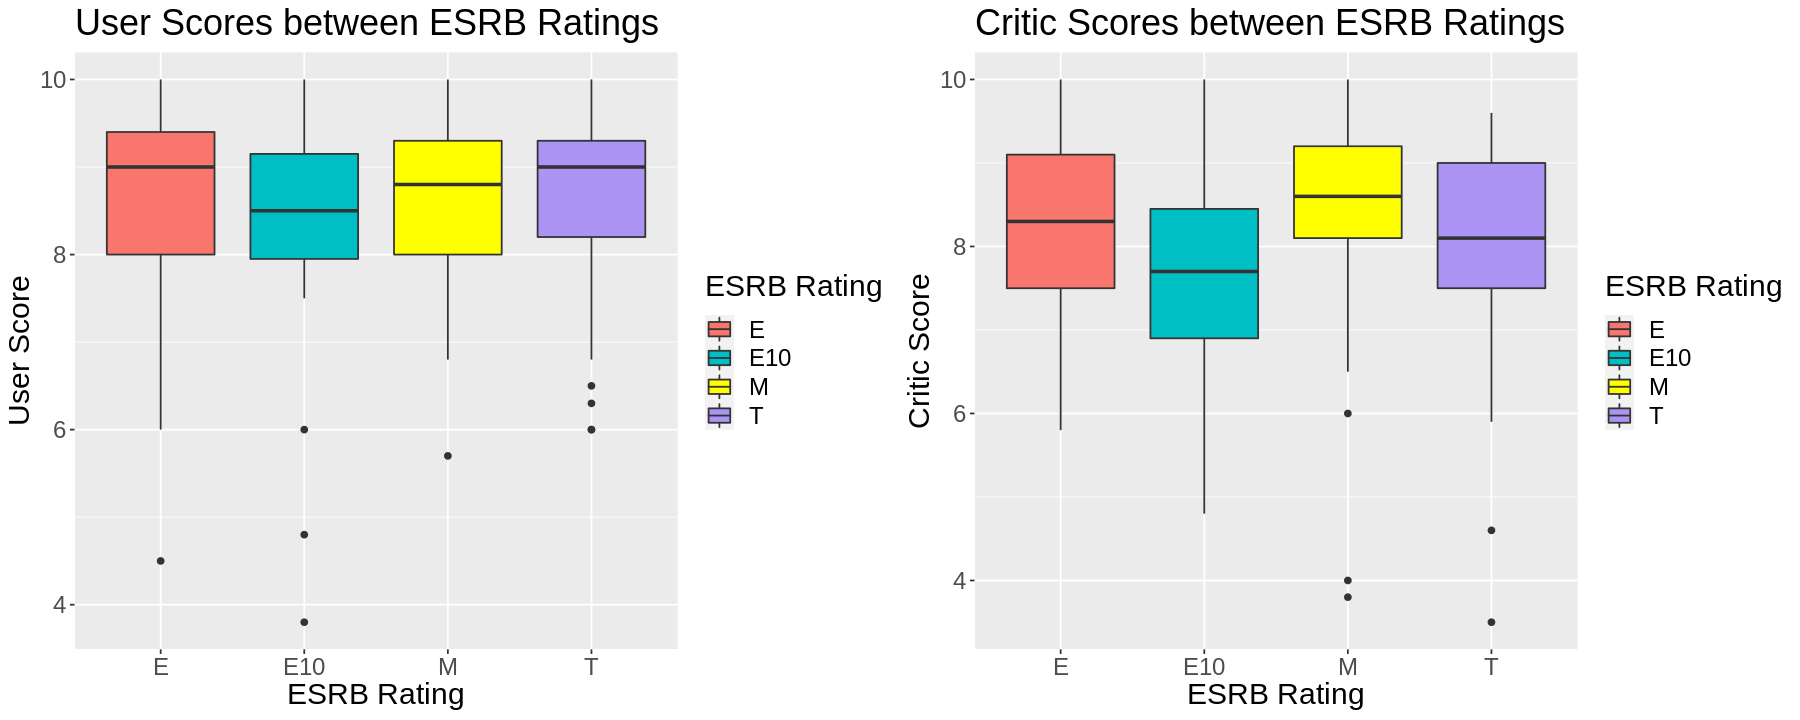

In [6]:
options(repr.plot.height = 6, repr.plot.width = 15)

dist_user <- wrangled_data %>%
    ggplot(aes(x = ESRB_Rating, y = User_Score, fill = ESRB_Rating)) +
    geom_boxplot() +
    labs(x = "ESRB Rating", y = "User Score", title = "User Scores between ESRB Ratings", fill = "ESRB Rating") +
    theme(text = element_text(size = 18)) + 
    scale_fill_manual(values=c("#F8766D", "#00BFC4", "#FFFF00", "#AC94F4"))

dist_critic <- wrangled_data %>%
    ggplot(aes(x = ESRB_Rating, y = Critic_Score, fill = ESRB_Rating)) +
    geom_boxplot() +
    labs(x = "ESRB Rating", y = "Critic Score", title = "Critic Scores between ESRB Ratings", fill = "ESRB Rating") +
    theme(text = element_text(size = 18)) + 
    scale_fill_manual(values = c("#F8766D", "#00BFC4", "#FFFF00", "#AC94F4"))


plot_grid(dist_user, dist_critic)

*Figure 3.* Figure showing side-by-side boxplots.

## Methods

We believe that this is a good dataset to use to answer our research question. The dataset was composed of the best-selling games, meaning that the scores can be a good representation of the population of all users and critics. The sample we collected is adequately random since some games lack the data needed for this project and there doesn’t seem to be a common pattern, so this sample is unbiased. Finally, each ESRB rating is adequately represented within our sample, shown in the summary table.

Our preliminary results are similar to what we initially expected such that there’s minor differences between the means of critic and user scores for each ESRB rating as shown in our summary table. We thought this would also be the case for the standard error of user and critic scores; however, our results show that there’s a greater difference for the ESRB ratings, Mature and Teen, which we will analyze in this report. Also, based on the side-by-side boxplots (see Figure 3), we can see slight differences between the distributions.

For our hypothesis testing, we will be using four one-sample t-tests to analyze the difference between `User_Score` and `Critic_Score`. Our null hypothesis states that there is no difference between user and critic scores among the four ESRB ratings which will be tested against our alternative hypothesis which states that there is a difference between user and critic scores among the four ESRB ratings. We will construct these tests on a 95% confidence interval and 5% significance level to answer our research quesiton. 

Considering our preliminary results, we expect to find that there are different impacts of ESRB Ratings on the variance between User and Critic Scores in the final report. We hope to gather a more accurate correlation of the different rating groups and use different data visualization tools to materialize our findings. The impact of these findings could reveal how user bias about a ESRB rating affects their rating on VGChartz when compared to a third party company. We could also draw from our aforementioned research papers to reveal how ESRB ratings can be improved to better serve the consumers that benefit most from it. 

## References

Alqunber, A. (2019). Video games sales 2019. *Kaggle*. https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019 

ESRB Game Ratings (2022). *ESRB Ratings*. https://www.esrb.org/ 

Felini, D. (2015). Beyond Today’s Video Game Rating Systems: A Critical Approach to PEGI and ESRB, and Proposed Improvements. *Games and Culture, 10*(1), 106-122. https://doi.org/10.1177/1555412014560192 

Laczniak, R. N., Carlson, L., Walker, D., & Brocato, E. D. (2017). Parental Restrictive Mediation and Children's Violent Video Game Play: The Effectiveness of the Entertainment Software Rating Board (ESRB) Rating System. *Journal of Public Policy & Marketing, 36*(1), 70-78. https://doi.org/10.1509/jppm.15.071 

VGChartz Ltd. (2022). About VGChartz. *VGChartz*. https://www.vgchartz.com/about.php